# Termodinámica

La termodinámica nace ante la ncesidad de estudiar los procesos físicos del trabajo para poder optimizar los mismos durante la revolución industrial. Se define como el estudio de la interacción entre la materia y el calor, sin embargo puede llegar a ocupar temas más diversos como metafísica e incluso teoría de la información por sus aportes en temas de orden y desorden como luego se verá.

Las principales leyes de la termodinámica son 4. Se intentarán de cubir de forma extensiva en el siguiente cuaderno.


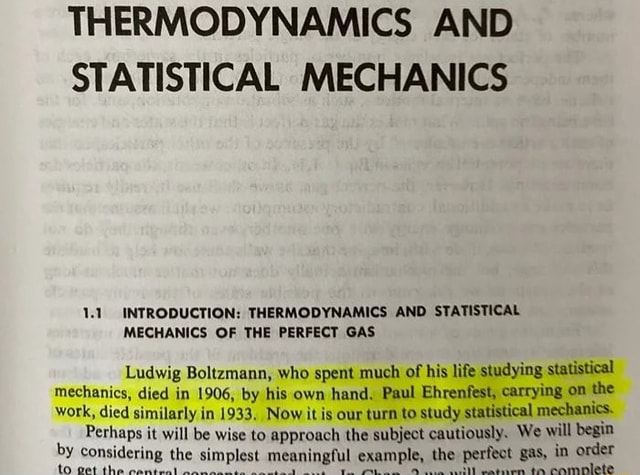

## Ley 0

La ley 0 de la termodinámica nos dice como un sistema alcanza un equilibrio térmico. Esta fue la ultima ley de la termodinámica en establecerse. Para efectos cotidianos se notará como esta ley puede llegar a parecer obvia o incluso intuitiva por nuestras experiencias con cuerpos calientes, sin embargo no exite para varias de las leyes termodinámicas fundamento absoluto en teoría sino mas bien en estadística y observación de los acontecimientos o fenómenos a nuestro alrededor.

Este establece que cuando dos sistemas están en equilibrio térmico con un tercero entonces estos sistemas estarán en equilibrio entre ellos.

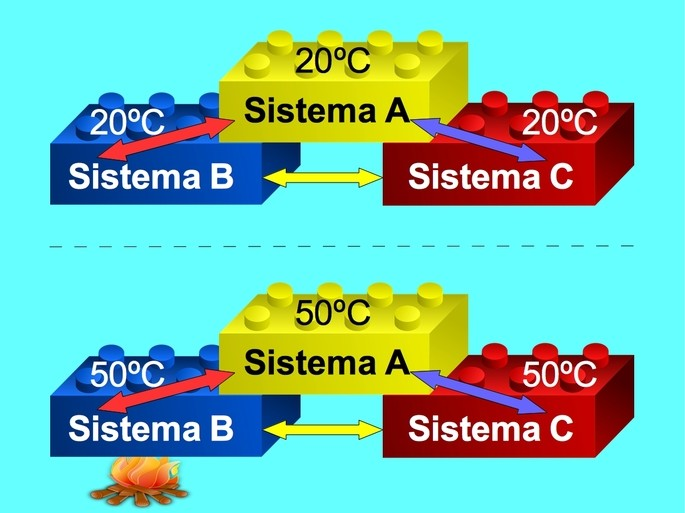

In [7]:
#Simulacion de una placa
from IPython.display import HTML
from IPython.display import display
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
import matplotlib as mpl
def generarPlaca():
    def graficoPlaca(tempA, tiempo):
        omega = 2 * np.pi/10
        A = tempA
        D = 0.5
        Lx = 10
        Xo = 5
        l = 1.5



        def Bn(L, n):
            lamX = lambda x: A * np.exp(-(x-Xo)**2 / l) * np.sin(n * np.pi / L)
            integral = integrate.quad(lamX, 0, L)
            resultado = integral[0] * 2 / L
            return resultado

        def aproximacionUXY(numeroTerminos, x, y, L):
            resultado = 0
            for termino in range(1, numeroTerminos+1):
                bn = Bn(L, termino)
                resultado += bn * np.sin(termino * np.pi * x / L) * np.exp( -termino**2 * np.pi**2 * D * y / L**2)
            return resultado

        dimension = 30
        numeroTerminos = 10
        x = np.linspace(0, Lx, dimension)
        y = np.linspace(0, Lx, dimension)
        X, Y = np.meshgrid(x, y)
        Z = aproximacionUXY(numeroTerminos, X, Y, Lx)

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_xlabel('x (m)')
        ax.set_ylabel('t (s)')
        ax.set_zlabel('p (k)')
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='cividis', edgecolor='none')
        fig2, ax2 = plt.subplots()
        t = tiempo
        temp1 = np.average(Z[t][0:10])
        t1 = np.ones(shape = (10,10)) * temp1
        temp2 = np.average(Z[t][10:20])
        t2 = np.ones(shape = (10,10)) * temp2
        temp3 = np.average(Z[t][20:30])
        t3 = np.ones(shape = (10,10)) * temp3
        temps = np.concatenate((t1,t2,t3), axis=0)
        norm = mpl.colors.Normalize(vmin=0, vmax=4)
        ax2.imshow(np.transpose(temps), norm=norm)
        ax2.axes.yaxis.set_ticklabels([])
        ax2.axes.xaxis.set_ticklabels([])
        plt.colorbar(mpl.cm.ScalarMappable(norm=norm))
        plt.show()
        return 

    tempEtiqueta = widgets.Label(value='Temperatura $k$')
    tempSlider = widgets.FloatSlider(min=2, max=5, step = 0.1)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    play = widgets.Play(value=0, min=0, max=29, step=1, disabled=False)
    tieSlider = widgets.IntSlider(min=0, max=29, step=1)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTemp = widgets.HBox([tempEtiqueta, tempSlider])
    cajaTie = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(graficoPlaca, {'tempA':tempSlider, 'tiempo':tieSlider})

    display(cajaTemp, cajaTie, play, salida)
    
generarPlaca()

Play(value=0, max=29)

Output()

## Primera ley

De forma simplificada se puede mencionar como la primera ley de la termodinamica se habla sobre la conservación de la energía y más específico somo pueden ocurrir cambios en ella. Como el calor siendo un tipo de energía se puede expresar en términos de cambio sobre la energía interna y trabajo ocurrido durante un proceso. 

Se establece por medio de la ecuación:

$Q=\Delta U+W$

Donde U es la energía interna del sistema, W es el trabajo y Q es el calor.

En las siguientes simulaciones veremos como es posible aplicar dicha ecuación para sistemas en específico para xonseguir extraer información valiosa sobre el estado del sistema y predicciones.

### Proceso adiabático

In [2]:
#Simulacion
#Variar presion y volumen y graficar el estado de energia interna

#Proceso adiabatico
from matplotlib.patches import Rectangle

def generarAdiabatico():
    def generarGrafica(presion, volumen):

        pres = presion
        vol = volumen
        ancho = 10
        altura = vol / ancho
        temperaturaMax = 30*200/10

        def calcularTemperatura(pres, vol):
            temperatura = presion*volumen
            rojo = temperatura/temperaturaMax
            return temperatura, rojo
        
        temp = calcularTemperatura(pres, vol)

        


        fig, ax = plt.subplots()
        fig2, ax2 = plt.subplots()
        patchCilindro =  Rectangle((-5, -6), ancho, altura, ec='black', fc=((temp[0]/10)/temperaturaMax,0,0))
        ax.add_patch(patchCilindro)
        ax.set_xlim(-20,20)
        ax.set_ylim(-20, 20)
        ax.text(-5,-5, 'Temperatura = ' + str(int(temp[0]/10)) + ' k', c = 'blue')
        ax2.bar(x=0,height=temp[0]/10)
        ax2.set_xlim(-2,2)
        ax2.set_ylim(0, temperaturaMax)
        ax2.set_ylabel('Temperatura $(k)$')
        ax2.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.axes.xaxis.set_ticklabels([])
        plt.show()

    volEtiqueta = widgets.Label(value='Volumen $(m^3)$')
    volSlider = widgets.FloatSlider(min=100, max=200, step=25)
    volCaja = widgets.HBox([volEtiqueta, volSlider])
    presionEtiqueta = widgets.Label(value='$(\dfrac{N}{m^3})$')
    presionSlider = widgets.FloatSlider(min = 1, max = 30, step = 0.5)
    presionCaja = widgets.HBox([presionEtiqueta, presionSlider])
    
    salida = widgets.interactive_output(generarGrafica, {'presion': presionSlider, 'volumen': volSlider})
    
    display(presionCaja, volCaja, salida)

generarAdiabatico()

Output()

### Proceso isocórico

In [3]:
#Simulacion
#Variar temperatura y graficar presion

def generarIsocorico():
    def generarGrafica(temperatura):
        ancho = 10
        altura = 10
        tempMaxima = 300
        temp1 = temperatura
        rojo = temp1/tempMaxima
        vol = 30

        def calcularPresion(temperatura):
            presion = temperatura/vol
            return presion

        presion = calcularPresion(temp1)
        
        fig, ax = plt.subplots()
        fig2, ax2 = plt.subplots()
        patchCilindro =  Rectangle((-5,-5), ancho, altura, ec='black', fc=(rojo,0,0))
        ax.text(-5,-5, 'Presión: '+ str(int(presion)) + ' $(kPa)$', c = 'white')
        ax.add_patch(patchCilindro)
        ax.set_xlim(-20,20)
        ax.set_ylim(-20, 20)
        ax2.bar(x = 0, height = presion)
        ax2.set_xlim(-2, 2)
        ax2.set_ylim(0, tempMaxima/vol)
        ax2.axes.xaxis.set_ticklabels([])
        ax2.set_ylabel('Presion $(kPa)$')
        plt.show()

    tempEtiqueta = widgets.Label(value = 'Temperatura $(k)$')
    tempSlider = widgets.FloatSlider(min = 20, max = 300, step = 25)
    tempCaja = widgets.HBox([tempEtiqueta, tempSlider])

    salida = widgets.interactive_output(generarGrafica, {'temperatura': tempSlider})

    display(tempCaja, salida)

generarIsocorico()

Output()

### Proceso isobárico

In [4]:
#Simulacion
#Variar volumen graficar trabajo

trabajo = [0]

def generarIsobarico():
    global trabajo
    volumenActual = 100
    def generarGrafica(volumen):
        global trabajo
        volumenNuevo = volumen
        volumenTrabajo = abs(volumenNuevo - volumenActual)
        volumenNuevo = volumenActual
        ancho = 10
        presion = 20
        altura = volumen/ancho
        tempMax = presion * 150

        def calcTempPresionConstante(volumen):
            temp = volumen * presion
            return temp

        temp = calcTempPresionConstante(volumenActual)

        trabajo += [trabajo[-1] + presion * volumenTrabajo]

        fig, ax = plt.subplots()
        fig2, ax2 = plt.subplots()
        patchCilindroAbajo =  Rectangle((-5,-5), ancho, altura, ec='black', fc=(temp/tempMax,0,0))
        patchCilindroArriba = Rectangle((-5,-5+altura), ancho, 15-altura, ec='black', fc=(1,1,1))
        ax.add_patch(patchCilindroAbajo)
        ax.add_patch(patchCilindroArriba)
        ax2.plot(trabajo)
        ax2.set_ylabel('Trabajo $(J)$')
        ax2.set_xlabel('Iteración')
        ax.set_xlim(-20,20)
        ax.set_ylim(-20, 20)
        ax.axes.yaxis.set_ticklabels([])
        ax.axes.xaxis.set_ticklabels([])
        plt.show()

    volumenLabel = widgets.Label(value='Volumen $(m^3)$')
    volumenSlider = widgets.FloatSlider(min = 100, max = 150, step = 15)
    volumenCaja  = widgets.HBox([volumenLabel, volumenSlider])

    salida = widgets.interactive_output(generarGrafica, {'volumen':volumenSlider})

    display(volumenCaja, salida)
    
generarIsobarico()

Output()

### Proceso isotérmico

## Segunda ley 

La segunda ley de la termodinámica nos menciona como la entroía del Universo siempre debe aumentar o mantenerse igual. La entroía es una medida física que con regularidad se introduce como la medida del desorden, pero va más alla de esto la explicación nos da una deducción para poder hablar en términos técnicos sobre la reversibilidad e irreversibilidad de los procesos, así también como si una reacción es no espontánea. 

La termodináica notamos que por medio de esta segunda ley se expanden los horizontes abarcando temas diversos como la teoría de la información, metafísica o filosofía donde la direccción del tiempo se entrelaza con la segunda ley de la termodinámica dando una explicación o intento de explicación a la dirección del tiempo con la pregunta, ¿la entroía es la que le da la dirección al tiempo o es el tiempo el que le da la dirección a la entropía. Es importante mencionar que esta ley se considera del tipo estadística, hay mucha evidencia científica para pensar que es una ley fundamental, sin embargo la única razón por la que se considera cierta es debido a la falta de contraejemplo que la contradiga, es una ley estadística. 

Debido a que la entropía siempre debe aumentar entonces esto nos imposibiita la posibilidad de tener una maquina térmica con 100% de eficiencia. En las siguientes ecuaciones se verá como esto ocurre y como la máxima eficiencia posible a extraer es la de una maquina o ciclo de Carnot la entropía es constante.


Segunda ley:

$\Delta S=\int_{1}^{2} \dfrac{dQ}{T}$


Eficiencia de Carnot depende unicamente en las diferencias de temperaturas absolutas:

$e=\dfrac{Q_H+Q_C}{Q_H}$



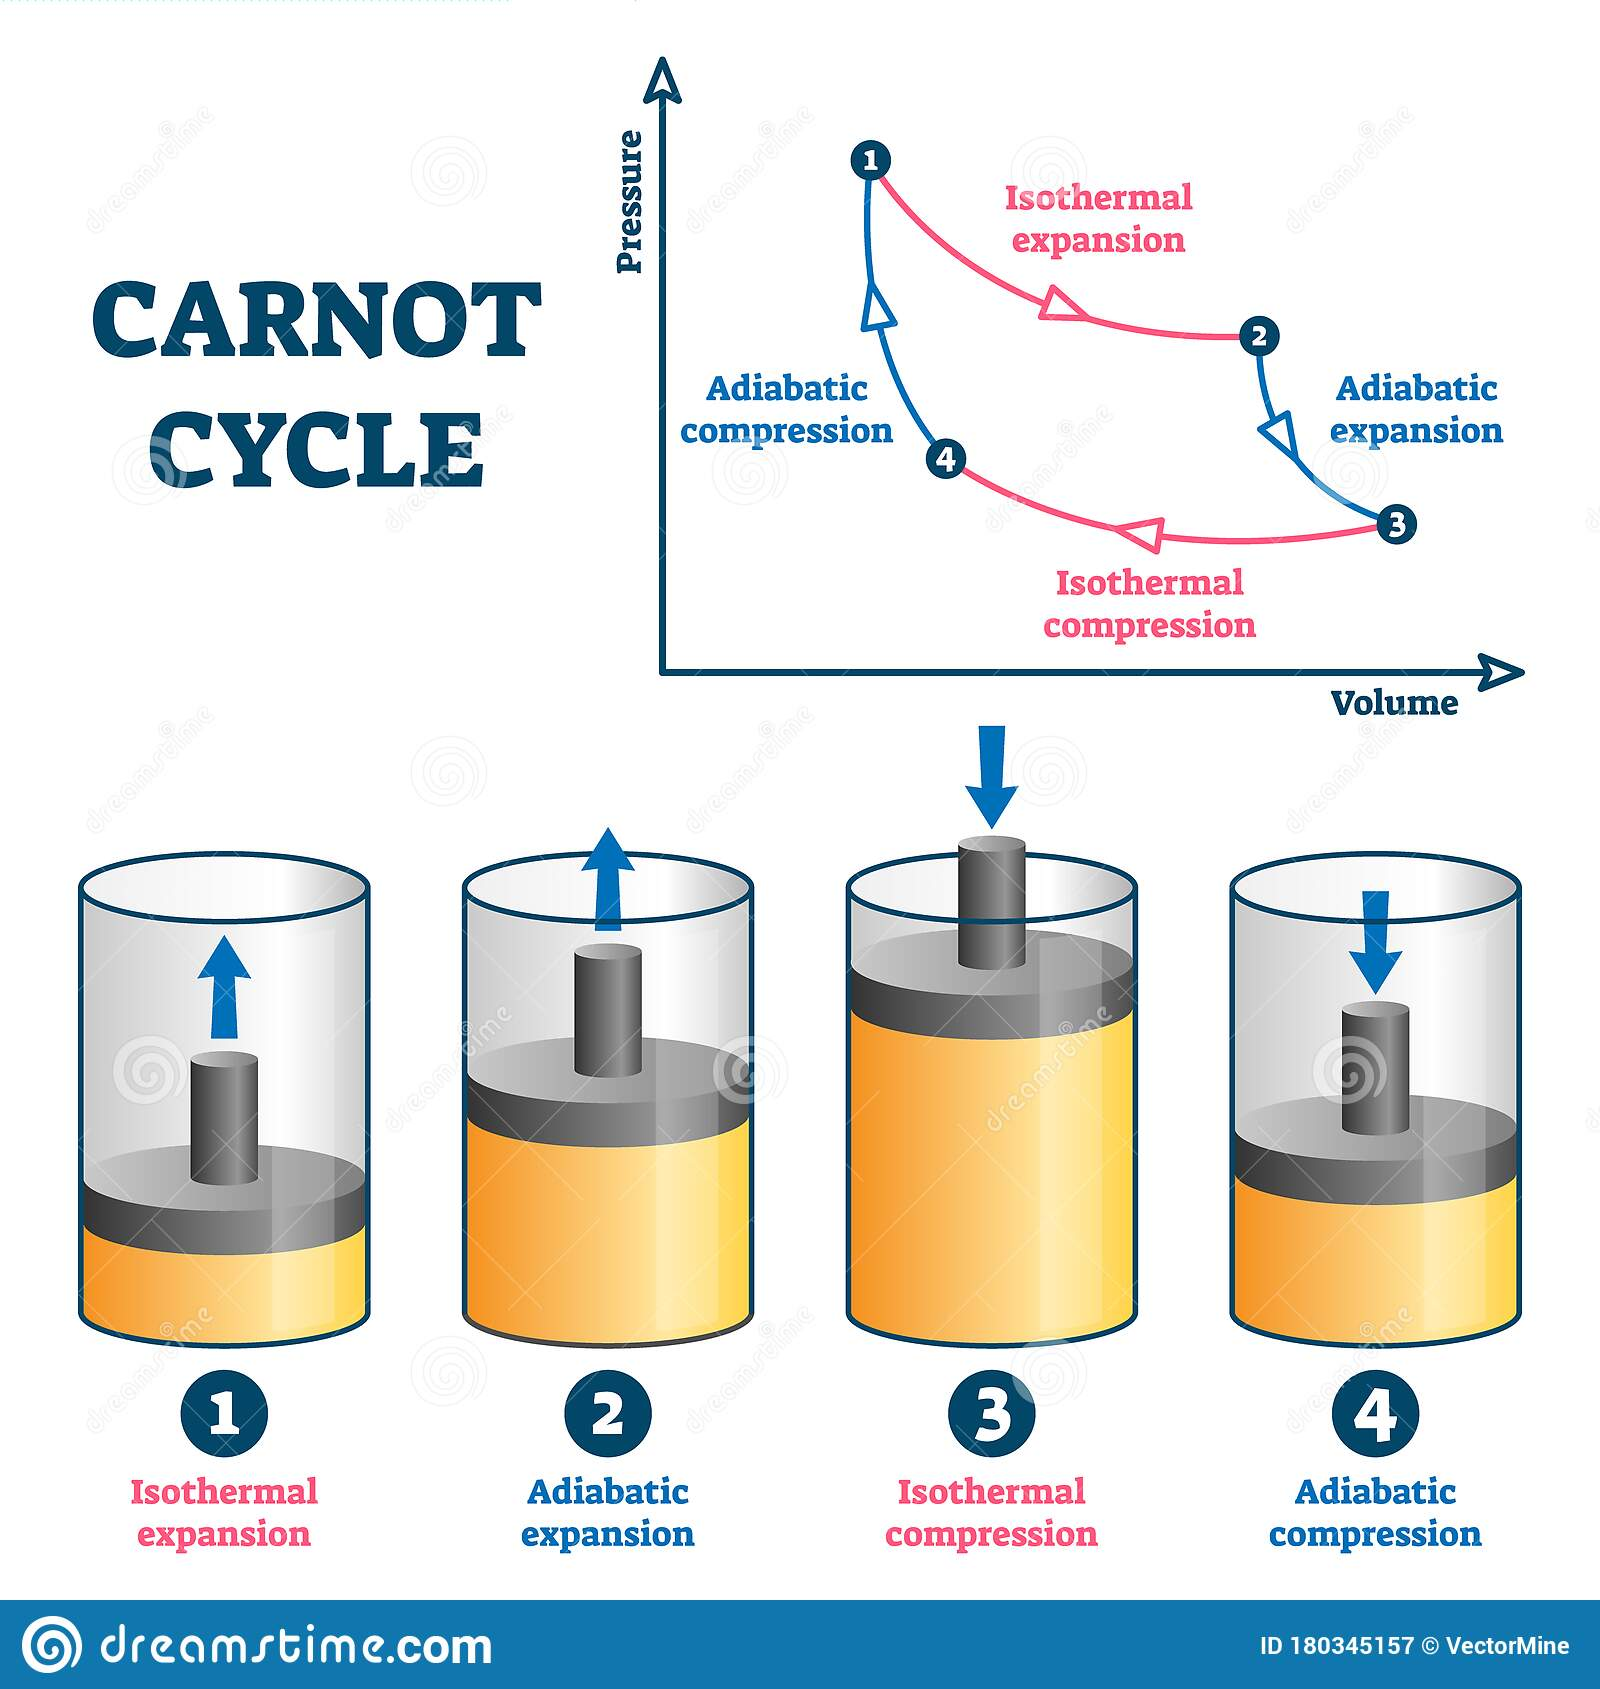

In [14]:
#Simulacion Carnot
def generarCarnot():
    def generarGrafica(paso, caliente, frio):
        reservaCaliente = caliente
        reservaFria = frio

        fig, ax = plt.subplots()
        fig2, ax2 = plt.subplots()

        if paso == 1:
            ancho = 10
            altura = 5
            patchCilindroAbajo =  Rectangle((-5,-5), ancho, altura, ec='black', fc=(1,0,0))
            patchCilindroArriba = Rectangle((-5,-5+altura), ancho, 15-altura, ec='black', fc=(1,1,1))
            patchDeposito = Rectangle((-5,-7), ancho, 1, ec='black', fc=(0,0,1))
            ax.add_patch(patchDeposito)
            ax.add_patch(patchCilindroArriba)
            ax.add_patch(patchCilindroAbajo)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            #ax.text(-5, -6.5, 'Deposito, temperatura: ' + str(frio), c = 'white')
            vols = np.arange(20, 50, 0.1)
            ax2.plot(vols, caliente/vols)
            ax2.set_ylabel('Presion $(k)$')
            ax2.set_xlabel('Volumen $(m^3)$')

        elif paso == 2:
            return
        elif paso == 3:
            ancho = 10
            altura = 5
            patchCilindroAbajo =  Rectangle((-5,-5), ancho, altura, ec='black', fc=(0,0,1))
            patchCilindroArriba = Rectangle((-5,-5+altura), ancho, 15-altura, ec='black', fc=(1,1,1))
            patchDeposito = Rectangle((-5,-7), ancho, 1, ec='black', fc=(1,0,0))
            ax.add_patch(patchDeposito)
            ax.add_patch(patchCilindroArriba)
            ax.add_patch(patchCilindroAbajo)
            ax.set_xlim(-20,20)
            ax.set_ylim(-20, 20)
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
            ax.text(-5, -6.5, 'Deposito, temperatura: ' + str(caliente), c = 'white')
            vols = np.arange(20, 50, 0.1)
            ax2.plot(vols, caliente/vols)
            ax2.set_ylabel('Presion $(k)$')
            ax2.set_xlabel('Volumen $(m^3)$')
        else:
            return
        plt.show()
        return

    pasoEtiqueta = widgets.Label(value='Numero de paso Carnot')
    pasoSlider = widgets.IntSlider(min = 1, max = 4, step=1)
    pasoCaja = widgets.HBox([pasoEtiqueta,pasoSlider])

    calienteEtiqueta = widgets.Label(value='Deposito caliente $(k)$')
    calienteSlider = widgets.FloatSlider(min = 200, max = 300, step = 25)
    calienteCaja = widgets.HBox([calienteEtiqueta, calienteSlider])

    frioEtiqueta = widgets.Label(value='Deposito frío $(k)$')
    frioSlider = widgets.FloatSlider(min =50, max = 175, step = 25)
    frioCaja = widgets.HBox([frioEtiqueta, frioSlider])

    salida = widgets.interactive_output(generarGrafica, {'paso': pasoSlider, 'caliente': calienteSlider, 'frio': frioSlider})

    display(pasoCaja, calienteCaja, frioCaja, salida)
generarCarnot()

Output()

## Tercera ley

Finalmenta la tercerra ley tambien llamada el postulado de Nernst afirma que una vez en el cero absoluto de temperatura, ningúun proceso físico se podrá llevar a cabo. Esto tiene sentido porque como sabemos la temperatura es una medida macroscópica que trata de cuantificar la energía cinética de las partículas microscópicas. En cero absoluto no hay movimiento de las partículas por lo que el sistema físico se detiene. En la teoría moderna este postulado no es del todo aceptado ya que ninguna partícula puede llegar a cero absoluto por limitaciones de la mecánica cuántica.